# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [12]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [13]:
# YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [14]:
# YOUR CODE HERE
filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [15]:
# YOUR CODE HERE
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [16]:
#  Seeing if their are any missing values 
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [20]:
#Replacing the missing values 
df['Log GDP per capita_na'] = df['Log GDP per capita'].isnull()
df['Social support_na'] = df['Social support'].isnull()
df['Healthy life expectancy at birth_na'] = df['Healthy life expectancy at birth'].isnull()
df['Freedom to make life choices_na'] = df['Freedom to make life choices'].isnull()
df['Generosity_na'] = df['Generosity'].isnull()
df['Perceptions of corruption_na'] = df['Perceptions of corruption'].isnull()
df['Positive affect_na'] = df['Positive affect'].isnull()
df['Negative affect_na'] = df['Negative affect'].isnull()
df['Confidence in national government_na'] = df['Confidence in national government'].isnull()
df['Democratic Quality_na'] = df['Democratic Quality'].isnull()
df['Delivery Quality_na'] = df['Delivery Quality'].isnull()
df['GINI index (World Bank estimate)_na'] = df['GINI index (World Bank estimate)'].isnull()
df['GINI index (World Bank estimate)_na, average 2000-15'] = df['GINI index (World Bank estimate), average 2000-15'].isnull()
df['gini of household income reported in Gallup, by wp5-year_na'] = df['gini of household income reported in Gallup, by wp5-year'].isnull()


In [23]:
# Replacing the missing values with the mean values of the column 
df['Log GDP per capita'].fillna(value=df['Log GDP per capita'].mean(), inplace = True)
df['Social support'].fillna(value=df['Social support'].mean(), inplace = True)
df['Healthy life expectancy at birth'].fillna(value=df['Healthy life expectancy at birth'].mean(), inplace = True)
df['Freedom to make life choices'].fillna(value=df['Freedom to make life choices'].mean(), inplace = True)
df['Generosity'].fillna(value=df['Generosity'].mean(), inplace = True)
df['Perceptions of corruption'].fillna(value=df['Perceptions of corruption'].mean(), inplace = True)
df['Positive affect'].fillna(value=df['Positive affect'].mean(), inplace = True)
df['Negative affect'].fillna(value=df['Negative affect'].mean(), inplace = True)
df['Confidence in national government'].fillna(value=df['Confidence in national government'].mean(), inplace = True)
df['Democratic Quality'].fillna(value=df['Democratic Quality'].mean(), inplace = True)
df['Delivery Quality'].fillna(value=df['Delivery Quality'].mean(), inplace = True)
df['GINI index (World Bank estimate)'].fillna(value=df['GINI index (World Bank estimate)'].mean(), inplace = True)
df['GINI index (World Bank estimate), average 2000-15'].fillna(value=df['GINI index (World Bank estimate), average 2000-15'].mean(), inplace = True)
df['gini of household income reported in Gallup, by wp5-year'].fillna(value=df['gini of household income reported in Gallup, by wp5-year'].mean(), inplace = True)

In [24]:
#Checking to see if their are any missing values left
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

country                                                        0
year                                                           0
Life Ladder                                                    0
Log GDP per capita                                             0
Social support                                                 0
Healthy life expectancy at birth                               0
Freedom to make life choices                                   0
Generosity                                                     0
Perceptions of corruption                                      0
Positive affect                                                0
Negative affect                                                0
Confidence in national government                              0
Democratic Quality                                             0
Delivery Quality                                               0
Standard deviation of ladder by country-year                   0
Standard deviation/Mean o

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [26]:
corrs = df.corr()['Life Ladder'].drop('Life Ladder', axis =0)
sort = pd.Series(corrs)
corrs_sorted = sort.sort_values(ascending=False)
print(corrs_sorted)


Log GDP per capita                                             0.772222
Healthy life expectancy at birth                               0.729544
Social support                                                 0.697204
Delivery Quality                                               0.672152
Democratic Quality                                             0.577380
Positive affect                                                0.552625
Freedom to make life choices                                   0.523331
Generosity                                                     0.199116
GINI index (World Bank estimate)_na, average 2000-15           0.115037
Generosity_na                                                  0.082655
Perceptions of corruption_na                                   0.062805
Social support_na                                              0.052647
Positive affect_na                                             0.013685
Negative affect_na                                             0

In [27]:
# Fitting the model to only use features that are top 4
top_4_corr = list(corrs_sorted.index[:4])
top_4_corr

['Log GDP per capita',
 'Healthy life expectancy at birth',
 'Social support',
 'Delivery Quality']

In [30]:
y = df['Life Ladder']
X = df[top_4_corr]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features: " + str(X.shape[1]))
print((X.columns))
print(y)

Number of examples: 1562

Number of Features: 4
Index(['Log GDP per capita', 'Healthy life expectancy at birth',
       'Social support', 'Delivery Quality'],
      dtype='object')
0       3.723590
1       4.401778
2       4.758381
3       3.831719
4       3.782938
          ...   
1557    4.690188
1558    4.184451
1559    3.703191
1560    3.735400
1561    3.638300
Name: Life Ladder, Length: 1562, dtype: float64


In [34]:
#testing the training set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=123)

In [35]:
print(X_train.shape)
print(X_test.shape)

(1046, 4)
(516, 4)


In [37]:
#importing more needed packages 
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#Creating KNeighborsClassifier model odject
model = KNeighborsClassifier(3)

In [48]:
#Fitting the KNN model and performing the model
rmse_val = []
for K in range(1,45):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ', K, 'is: ', error)
    

RMSE value for k=  2 is:  0.5905657969583271
RMSE value for k=  3 is:  0.5570168844308359
RMSE value for k=  4 is:  0.567204134007461
RMSE value for k=  5 is:  0.5684324293749906
RMSE value for k=  6 is:  0.5703667668955782
RMSE value for k=  7 is:  0.57210680659317
RMSE value for k=  8 is:  0.5725281507034772
RMSE value for k=  9 is:  0.5740914427422362
RMSE value for k=  10 is:  0.5741401184731675
RMSE value for k=  11 is:  0.5827342473017451
RMSE value for k=  12 is:  0.5868410809662298
RMSE value for k=  13 is:  0.5913954696776343
RMSE value for k=  14 is:  0.596109570959208
RMSE value for k=  15 is:  0.5990490321622388
RMSE value for k=  16 is:  0.5974471581559408
RMSE value for k=  17 is:  0.5994797099378419
RMSE value for k=  18 is:  0.6002180787572146
RMSE value for k=  19 is:  0.6025385583744703
RMSE value for k=  20 is:  0.6048334064146139
RMSE value for k=  21 is:  0.6043050707041324
RMSE value for k=  22 is:  0.6062035745340337
RMSE value for k=  23 is:  0.6071141258594009


In [49]:
#Evaluating the model
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, pred)))
# Results closer to 1 are best 
print('R^2 =  %.2f' % r2_score(y_test, pred))


Model Performance

RMSE =   0.63
R^2 =  0.69


<AxesSubplot:>

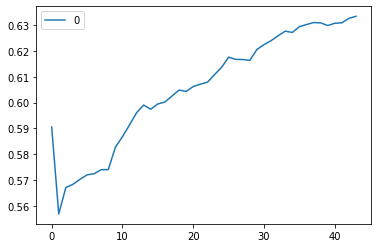

In [50]:
#Ploting the values of rmse with k values
curve = pd.DataFrame(rmse_val)
curve.plot()


In [53]:
# Best value is when K=4

best_k_model = neighbors.KNeighborsRegressor(n_neighbors = 4)
best_k_model.fit(X_train, y_train)
predict_best = best_k_model.predict(X_test)

# Evaluating the best_k_model 
print('\nModel Performance\n\nRMSE =   %.2f' % np.sqrt(mean_squared_error(y_test, pred)))
# Results closer to 1 are best 
print('R^2 =  %.2f' % r2_score(y_test, pred))


Model Performance

RMSE =   0.63
R^2 =  0.69
